In [1]:
from nltk.tokenize import RegexpTokenizer
#from stop_words import get_stop_words
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from pandas import DataFrame
import pandas as pd
import os
import io
import glob
import nltk
import sklearn
import re
from string import punctuation

tokenizer = RegexpTokenizer(r'\w+')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
# compile sample documents into a list
files = glob.glob('data/workshop-content18/4-comm100/data/comm100_data/*')
conversations = []
for file in files:
    f = open(file,'r', encoding='utf-16-le')
    conversation = f.read()[1:]
    conversations.append(conversation)
    f.close()
doc_set = conversations

# list for tokenized documents in loop
texts = []

keywords = ['account','website','live','ticket','www','file','team',
           'transcript','contacting','https','system','operator','send',
           'software','company','service','customer','livechat','button','png',
           'support','message','link','login','version','site','page','address',
           'info','click','auto','sales','code','aspx','saved','change',
           'window','id','mail','online','campaign','feature','html','business',
           'password','emails','provider','app','information','plan',
           'name','reply','trial','test','marketing','knowledgebase',
           'http','option','jpg','number','log','user','card','pricing',
           'error','offline','screenshot','mobile','list','billing','month',
           'enterprise','phone','customers','client','report','settings',
           'data','translation','call','product','web','url','edition',
           'pay','solution','request','invitation','server','browser','admin',
           'screen','tech','image','charge','chatbot','console','setting',
           'desktop','features','update','clients','video','access',
           'download','reports','language','technical','history',
           'credit','messages','users','operators','custom','price','form',
           'guide','install','ip','api','siteid','offer','demo',
           'manager','date','upgrade','testing','shot','logged','spam','setup',
           'connect','dashboard','invoice','rob','register','reset','cost',
           'remove','paid','cancel','due','buy','accounts','options','connected',
           'audio','sending','integration','credits','contacts','status',
           'application','enable','google','transferred','platform',
           'chrome','customize','services','touch','box','transfer',
           'blog','routing','delete','net','pop','tool','monitor','paste',
           'panel','changed','computer','office','network','developers',
           'package','text','campaigns','amount','course','integrate','article',
           'products','secure','bank','process','default','websites','english',
           'sale','installed','deleted','session','control','purchase','manually',
           'permission','skype','transcripts','ban','planid','codes','charged',
           'departments','search','rating','requirements','program',
           'tab','prntscr','icon','monthly','chatserver','registered',
           'android','windows','bill','tickets','enabled','delay','pass',
           'function','paypal','referring','knowledge','base','sites','newsletter',
           'script','salesforce','meeting','export','menu','assign',
           'quote','display','period','domain','specialist','mailing','desk',
           'activate','queue','chinese','connection','updated','facebook',
           'installation','emailmarketing','route','management',
           'manual','pages','disable','gmail','upload','internet',
           'addresses','notification','iphone','release','webhook',
           'developer','survey','wordpress','subscription','security',
           'feedback','credentials','blocked','volume','popup','businesses',
           'echat','limit','schedule','webpage','removed','discount','area',
           'china','username','instructions','incoming','air','links',
           'ios','location','portal','license','block','private','refresh',
           'loading','source','record','colleague','javascript','numbers',
           'document','junk','css','manage','featurelist','tag','subscribe',
           'development','servers','chatwindow','apps','purchased',
           'ashx','format','paying','articles','public','performance','clicked',
           'fee','banned','party','adobe','released','policy','vpn','siteregister',
           'plugin','logging','center','flash','track','submit','style',
           'confirmation','worldwide','module','prechat','permissions',
           'supervisor','emailed','boss','techs','mode','klaslive','zone',
           'comment','internal','displayed','requests','automatic',
           'automatically','store','routed','analytics','zip','administrator',
           'brain','zendesk','desk','category','inbox','members','traffic',
           'buttons','backend','restart','deactivated','customization',
           'subject','translate']

#dictionary = keywords

for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if i in keywords]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [2]:
def data_preparation(file, keywords, dictionary):
    f = open(file,'r', encoding='utf-16-le')
    conversation = f.read()[1:]
    f.close()
    raw = conversation.lower()
    tokens = tokenizer.tokenize(raw)
    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if i in keywords]
    # stem tokens
    texts = [p_stemmer.stem(i) for i in stopped_tokens]
    #print(texts)
    # convert tokenized documents into a document-term matrix
    corpus = dictionary.doc2bow(texts)
    return corpus


In [11]:
probability = []
for num_topics in range(5,20):
    # generate LDA model
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=20)
    #print(ldamodel.print_topics(num_topics=8, num_words=4),'\n')

    files = glob.glob('data/workshop-content18/4-comm100/data/comm100_data/*')
    count = 0
    success = 0
    sum_prob = 0
    for file in files:
        count = count + 1
        sample = data_preparation(file,keywords,dictionary)
        prediction = ldamodel[sample]
        max_prob = 0
        for i in range(len(prediction)):
            #if prediction[i][1]>1/3:
            #    success = success+1
            #    break
            if prediction[i][1]>max_prob:
                max_prob = prediction[i][1]
        sum_prob = sum_prob + max_prob
    #print('number of topics = ' + str(num_topics) + ' gives classification accuracy ' + str(success/count))
    probability.append(sum_prob/count)
    print('number of topics = ' + str(num_topics) + ' gives average classification probability ' + str(sum_prob/count))

number of topics = 5 gives average classification probability 0.619905402056
number of topics = 6 gives average classification probability 0.576469175079
number of topics = 7 gives average classification probability 0.575846746771
number of topics = 8 gives average classification probability 0.547484569208
number of topics = 9 gives average classification probability 0.544268992173
number of topics = 10 gives average classification probability 0.521272697386
number of topics = 11 gives average classification probability 0.526893366421
number of topics = 12 gives average classification probability 0.508633806631
number of topics = 13 gives average classification probability 0.49651995222
number of topics = 14 gives average classification probability 0.484416761804
number of topics = 15 gives average classification probability 0.486494693228
number of topics = 16 gives average classification probability 0.480848318641
number of topics = 17 gives average classification probability 0.47397

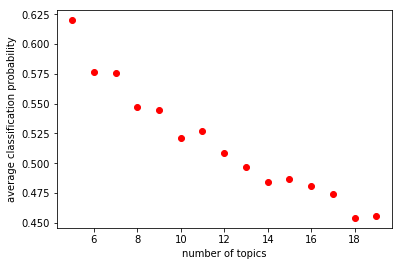

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(5,20),probability,'ro')
plt.xlabel('number of topics')
plt.ylabel('average classification probability')
plt.show()
    

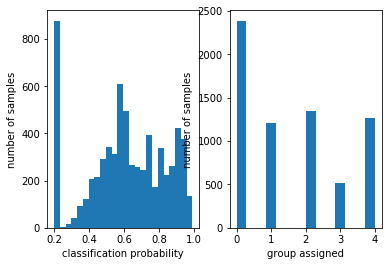

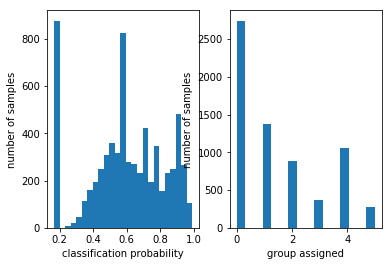

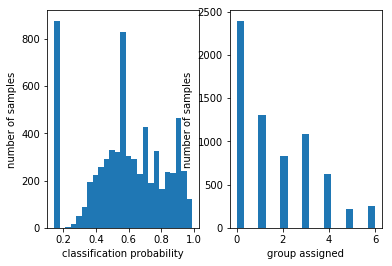

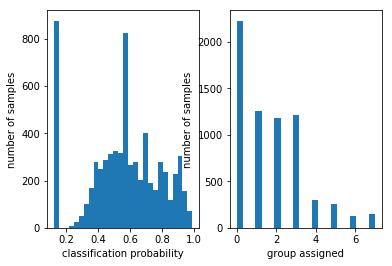

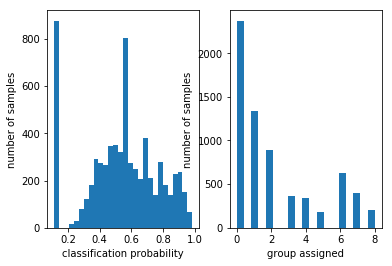

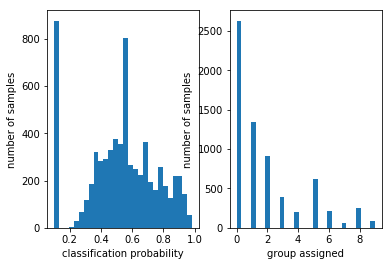

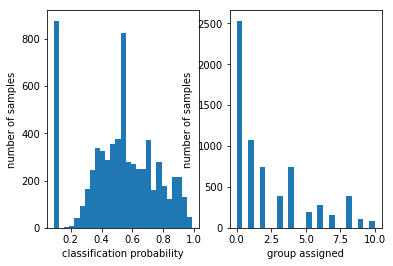

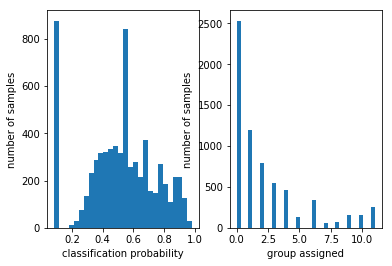

In [13]:
probability = []
for num_topics in range(5,13):
    # generate LDA model
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=20)
    #print(ldamodel.print_topics(num_topics=8, num_words=4),'\n')
    probs = [] 
    groups = []
    files = glob.glob('data/workshop-content18/4-comm100/data/comm100_data/*')
    for file in files:
        sample = data_preparation(file,keywords,dictionary)
        prediction = ldamodel[sample]
        max_prob = 0
        for i in range(len(prediction)):
            if prediction[i][1]>max_prob:
                max_prob = prediction[i][1]
                group = i 
        probs.append(max_prob)
        groups.append(group)
    plt.figure(num_topics)
    plt.title('stats for '+ str(num_topics) + ' topics')
    plt.subplot(121)
    plt.hist(probs,bins='auto')
    plt.xlabel('classification probability')
    plt.ylabel('number of samples')
    plt.subplot(122)
    plt.hist(groups,bins='auto')
    plt.xlabel('group assigned')
    plt.ylabel('number of samples')
    #plt.xlabel('number of topics')
    #plt.ylabel('average classification probability')
    plt.show()

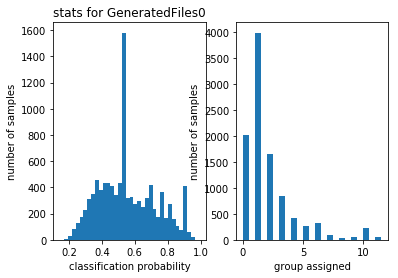

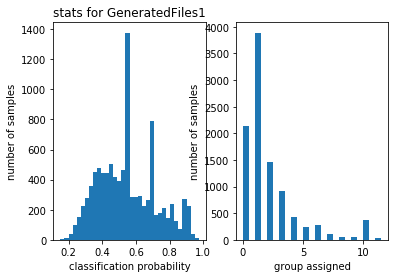

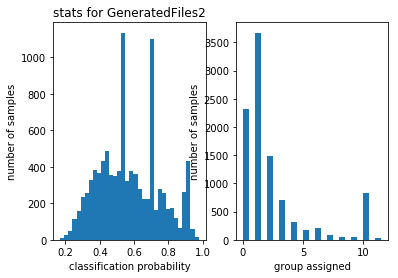

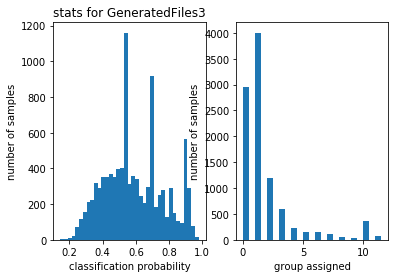

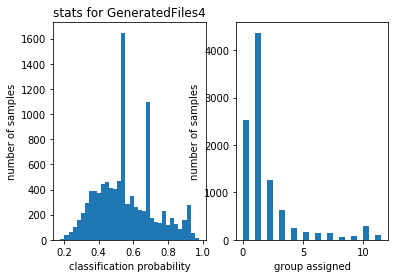

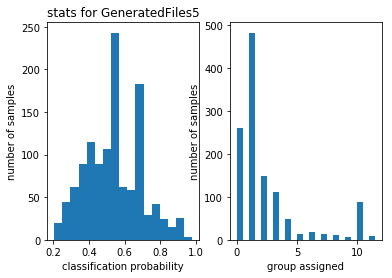

In [14]:
import numpy as np
probability = []
passes = 20
iterations = 400
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=12, id2word = dictionary, 
                                           iterations = iterations, passes=passes)
distribution_vector = []   
for j in range(6):
    probs = [] 
    groups = []
    files = glob.glob('data/workshop-content18/4-comm100/data/GeneratedFiles' + str(j)+ '/*')
    for file in files:
        sample = data_preparation(file,keywords,dictionary)
        prediction = ldamodel[sample]
        max_prob = 0
        for i in range(len(prediction)):
            if prediction[i][1]>max_prob:
                max_prob = prediction[i][1]
                group = i 
        probs.append(max_prob)
        groups.append(group)
    plt.figure(j)
    plt.subplot(121)
    plt.title('stats for GeneratedFiles' + str(j))
    plt.hist(probs,bins='auto')
    plt.xlabel('classification probability')
    plt.ylabel('number of samples')
    plt.subplot(122)
    counts, bins, bars = plt.hist(groups,bins=np.arange(0,12,0.5))
    distribution_vector.append(counts)
    plt.xlabel('group assigned')
    plt.ylabel('number of samples')
    #plt.xlabel('number of topics')
    #plt.ylabel('average classification probability')
    plt.show()

In [7]:
print(distribution_vector[0])
cov = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        ab = np.dot(distribution_vector[i],distribution_vector[j])
        a = np.dot(distribution_vector[i],distribution_vector[i])
        b = np.dot(distribution_vector[j],distribution_vector[j])
        cov[i][j]= ab/np.sqrt(a*b)
print(cov)

[ 2987.     0.  1989.     0.  1120.     0.  1164.     0.  1832.     0.
   326.     0.   100.     0.   158.     0.    58.     0.    17.     0.
    12.     0.   234.]
[[ 1.          0.99614738  0.9668778   0.9703257   0.98201785]
 [ 0.99614738  1.          0.973367    0.97442722  0.98956776]
 [ 0.9668778   0.973367    1.          0.99268764  0.95409773]
 [ 0.9703257   0.97442722  0.99268764  1.          0.96137265]
 [ 0.98201785  0.98956776  0.95409773  0.96137265  1.        ]]


In [8]:
print(bars)

<a list of 23 Patch objects>


In [16]:
for i in range(12):
    print(ldamodel.show_topic(i))
    print('\n')

[('ticket', 0.19872835), ('transcript', 0.15248394), ('team', 0.10474037), ('system', 0.088814974), ('save', 0.062623993), ('contact', 0.027398489), ('send', 0.025226066), ('address', 0.025008246), ('tech', 0.024267936), ('inform', 0.01989028)]


[('support', 0.26733699), ('oper', 0.14244103), ('auto', 0.077549912), ('translat', 0.06634485), ('live', 0.045900453), ('technic', 0.029657669), ('product', 0.027998008), ('contact', 0.026749663), ('languag', 0.023462979), ('desk', 0.019413678)]


[('app', 0.11419617), ('version', 0.09764263), ('desktop', 0.057556219), ('browser', 0.05231785), ('mobil', 0.047938123), ('download', 0.047639895), ('applic', 0.039259806), ('server', 0.037903465), ('instal', 0.035549972), ('chrome', 0.030415017)]


[('sale', 0.059432272), ('featur', 0.049920101), ('price', 0.042249348), ('live', 0.038966168), ('busi', 0.033620715), ('team', 0.031155622), ('enterpris', 0.026192399), ('edit', 0.024844751), ('trial', 0.022357838), ('version', 0.021762107)]


[('code'

In [102]:
for num_topics in range(5,20):
    # generate LDA model
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=20)
    print( ' model evaluation is ' + str(ldamodel.log_perplexity(corpus)))

 model evaluation is -4.83222226801
 model evaluation is -4.78607028766
 model evaluation is -4.80234608028
 model evaluation is -4.75228063108
 model evaluation is -4.73574286762
 model evaluation is -4.72670955222
 model evaluation is -4.70329954813
 model evaluation is -4.70750190996
 model evaluation is -4.669355608
 model evaluation is -4.68185196478
 model evaluation is -4.64758499834
 model evaluation is -4.65828651659
 model evaluation is -4.6460402021
 model evaluation is -4.65924554485
 model evaluation is -4.64299711675


In [98]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=12, id2word = dictionary, passes=20)
    #print(ldamodel.print_topics(num_topics=8, num_words=4),'\n')
for j in range(6):
    files = glob.glob('data/workshop-content18/4-comm100/data/GeneratedFiles' + str(j) + '/*')
    count = 0
    success = 0
    for file in files:
        count = count + 1
        sample = data_preparation(file,keywords,dictionary)
        prediction = ldamodel[sample]
        for i in range(len(prediction)):
            if prediction[i][1]>0.5:
                success = success+1
    print('GeneratedFiles' + str(j) + ' gives classification accuracy ' + str(success/count))

GeneratedFiles0 gives classification accuracy 0.6148844653396018
GeneratedFiles1 gives classification accuracy 0.6159863604452913
GeneratedFiles2 gives classification accuracy 0.6688494861978642
GeneratedFiles3 gives classification accuracy 0.717628075837031
GeneratedFiles4 gives classification accuracy 0.6722672267226723
GeneratedFiles5 gives classification accuracy 0.6267547481420314


In [99]:
for i in range(12):
    print(ldamodel.show_topic(i))
    print('\n')

[('report', 0.08698038), ('price', 0.077500954), ('busi', 0.052784096), ('edit', 0.050778914), ('contact', 0.048041806), ('enterpris', 0.047581531), ('featur', 0.045055017), ('team', 0.04153214), ('version', 0.039637253), ('chatbot', 0.038670968)]


[('http', 0.17992622), ('www', 0.131432), ('livechat', 0.10435542), ('aspx', 0.069957018), ('link', 0.067764111), ('html', 0.06402871), ('knowledgebas', 0.057830244), ('live', 0.035979096), ('api', 0.025470929), ('oper', 0.022721477)]


[('support', 0.13988295), ('app', 0.077992432), ('version', 0.063735746), ('desktop', 0.039233867), ('download', 0.03585707), ('video', 0.035703279), ('browser', 0.026419891), ('applic', 0.02615544), ('technic', 0.022668), ('instal', 0.02243837)]


[('sale', 0.067528069), ('phone', 0.048147827), ('live', 0.043543905), ('client', 0.043260675), ('call', 0.033118486), ('user', 0.031811886), ('featur', 0.030993585), ('integr', 0.028064366), ('demo', 0.02725233), ('solut', 0.025902182)]


[('png', 0.11209542), ('

# BELOW ARE ALL DRAFTS

In [94]:
print('I love'+str(2))

I love2


In [ ]:
type(dictionary)
sample = data_preparation('data/workshop-content18/4-comm100/data/comm100_data/9.txt',keywords,dictionary)
#print(sample)
prediction = ldamodel[sample]
#len(ldamodel[sample])

In [48]:
for i in range(20):
    print(ldamodel.show_topic(i))
    print('\n')

[('png', 0.27911159), ('file', 0.18229403), ('screen', 0.058236647), ('invit', 0.05746657), ('shot', 0.047088828), ('imag', 0.040337298), ('screenshot', 0.036898453), ('send', 0.031735402), ('click', 0.023916362), ('pop', 0.022189738)]


[('contact', 0.30754319), ('chatbot', 0.15847743), ('name', 0.14783129), ('transfer', 0.13455479), ('blog', 0.082556635), ('adob', 0.038806364), ('air', 0.03739509), ('articl', 0.021989644), ('releas', 0.015259558), ('request', 0.011951364)]


[('ticket', 0.21469395), ('transcript', 0.16451709), ('team', 0.10081843), ('system', 0.094387792), ('save', 0.067173824), ('contact', 0.03226459), ('report', 0.025835931), ('address', 0.022575453), ('tech', 0.021513734), ('inform', 0.018677508)]


[('app', 0.086827025), ('integr', 0.07823956), ('mobil', 0.077726573), ('video', 0.076879784), ('featur', 0.066850789), ('api', 0.06472256), ('audio', 0.047006592), ('live', 0.046033274), ('android', 0.034262076), ('salesforc', 0.023656039)]


[('custom', 0.35039356), 

In [28]:
print(len(texts))
count=0
for i in texts:
    if not i:
        count=count+1
print(count)

6705
877


In [23]:
print(ldamodel)

LdaModel(num_terms=295, num_topics=8, decay=0.5, chunksize=2000)


In [10]:
print(stemmed_tokens)

['hello', 'bilal', 'ısnık', 'help', 'left', 'chat']


In [24]:
print(dictionary)

Dictionary(295 unique tokens: ['account', 'area', 'browser', 'campaign', 'chang']...)


In [2]:
print(ldamodel.print_topics(num_topics=10, num_words=4))

[(0, '0.050*"15" + 0.045*"oper" + 0.036*"visitor" + 0.025*"mari"'), (1, '0.091*"comm100" + 0.080*"visitor" + 0.078*"agent" + 0.037*"terri"'), (2, '0.072*"visitor" + 0.066*"comm100" + 0.063*"agent" + 0.031*"terri"'), (3, '0.114*"brian" + 0.082*"visitor" + 0.068*"agent" + 0.067*"comm100"'), (4, '0.078*"comm100" + 0.077*"visitor" + 0.069*"agent" + 0.035*"train"'), (5, '0.135*"mellisa" + 0.033*"visitor" + 0.029*"comm100" + 0.028*"agent"')]


In [34]:
en_stop = en_stop+(['com100','visitor'])
print(en_stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [100]:
#ldamodel[corpus[20]]
#ldamodel.log_perplexity(corpus)
ldamodel.bound(corpus)

-612415.0984560845